In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
!pip install -q dtreeviz
import warnings
import dtreeviz
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.7 MB/s eta 0:00:00


In [ ]:
from google.colab import files
files.upload()

In [4]:
df = pd.read_csv('/content/IRIS.csv')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
X = df.drop(columns=['species'])
Y = df['species']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [18]:
le = LabelEncoder()
vals = le.fit_transform(y_train)
y_train = pd.DataFrame(vals)
test_vals = le.transform(y_test)
y_test = pd.DataFrame(test_vals)

In [19]:
clf = DecisionTreeClassifier(max_depth=2)

In [20]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [21]:
print(clf.score(x_train,y_train))
print(clf.score(x_test,y_test))

0.975
0.9


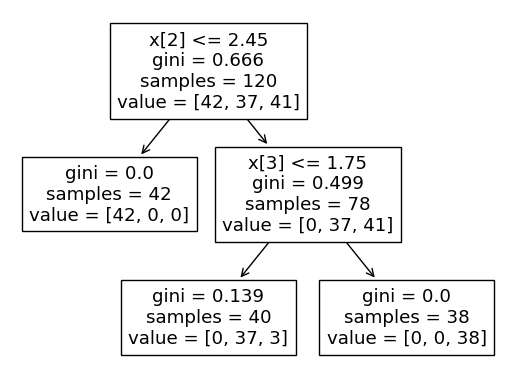

In [22]:
from sklearn.tree import plot_tree
plot_tree(clf);

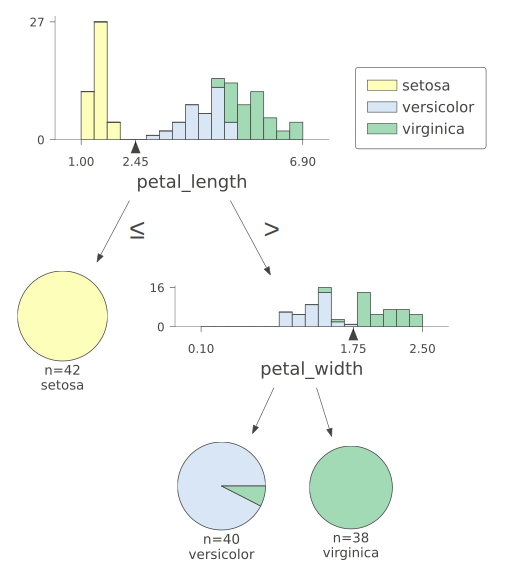

In [23]:
warnings.filterwarnings('ignore')
tree = dtreeviz.model(clf, x_train, y_train.squeeze().to_numpy(),
               feature_names=X.columns,
                target_name = 0,
               class_names=['setosa','versicolor','virginica'],
               )
tree.view(scale=2)

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf_clf = RandomForestClassifier(n_estimators=10,max_depth=3)

In [33]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [34]:
print(rf_clf.score(x_train,y_train))
print(rf_clf.score(x_test,y_test))

0.9833333333333333
0.9
